# Loading the dataset

In [1]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file
data, meta = arff.loadarff("../data/bone-marrow.arff")

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


# Checking for missing values

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Recipientgender         0
Stemcellsource          0
Donorage                0
Donorage35              0
IIIV                    0
Gendermatch             0
DonorABO                0
RecipientABO            0
RecipientRh             0
ABOmatch                0
CMVstatus               0
DonorCMV                0
RecipientCMV            0
Disease                 0
Riskgroup               0
Txpostrelapse           0
Diseasegroup            0
HLAmatch                0
HLAmismatch             0
Antigen                 0
Alel                    0
HLAgrI                  0
Recipientage            0
Recipientage10          0
Recipientageint         0
Relapse                 0
aGvHDIIIIV              0
extcGvHD                0
CD34kgx10d6             0
CD3dCD34                5
CD3dkgx10d8             5
Rbodymass               2
ANCrecovery             0
PLTrecovery             0
time_to_aGvHD_III_IV    0
survival_time           0
survival_status         0
dtype: 

# Visualizing the missing data

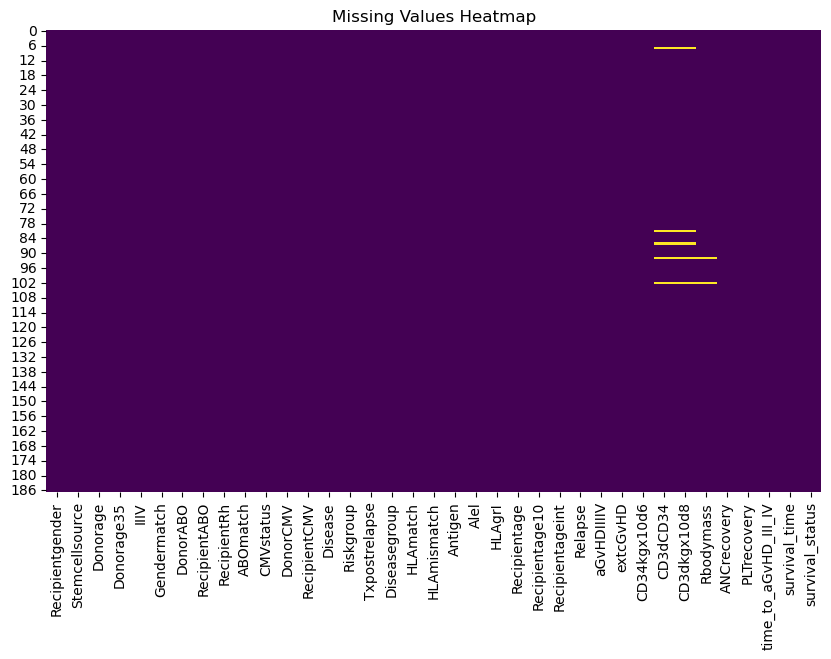

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Strategy 1 : Filling missing values with mean (didn't work because of TypeError)

In [4]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Verify that there are no more missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Handling')
plt.show()

TypeError: Could not convert [b'1110010111001111100111010111100111101000111110100001110111001110101011010001001111110011100100011110110010001111010010001101010111000110111100011010111101011110111110110010011010111110011'
 b'1000101011111010111111110101111101111111101011010011111111011000001111111010010111110101101011111111111111111101111110111101110111111111010101110111110111011110111110111111111111101111111'
 b'0001000000011001111011000011010010101110001001010000110000101011110100100111100000101100001000100011011000011110001101000001011011101100011111110100110101001010000100000101011110100110001'
 b'1111001101010110111001101011111010100010110001111010001001001010001011110011110110100001111111010111101110110111010110100111101010101111001011000010000111101110110010110111100111111010111'
 b'0000000001000000000010000110000010000000100010100000000000000100000000000001000000000010100100010010010000001000000000000001000011000000000000010010101001000000010000000010011010011000000'
 b'1-1-1112002101001022010-111-12-1111110-11100010100000-10100-111221-1011-1000111012012010-11111111-110-100002001010-1010-100101001000-101-11010010000111000-10-100001-1-11022101-1-1011210-1-1-1-10120112-11100111011111'
 b'1-1-12201100-11111-10010121-1-10-1-101-11-1011-1-1000-11-1101-111001120000-1-101-1-110111-101001010-1-1-111111211-1-1011011110100011101-111-10-1-1010-11-1112011?1010-10-101-100-1-1011110112-1-1-1-1111121-1-11-1-1-110212-1-12-112-1110-102'
 b'11110101111111111111111111111111111011111111011111101101011111110111111111111110001111101101100111111111111111111011111101111011??111011111111100111111111111101101111111101111111001101111'
 b'000111111110110111111101010110101100110101111010100010111111111111100111111111111100001111110110101001010111111111011111001011111?110110111000111110111011001001011011111111111111011101111'
 b'30210??12210100311?33233000?23?122313221100?0023231220333332001312232230302?30233223220022000?101000132?0?200220?1100233000002023?1230301?022210222?3??232222232222213232301011202201332301'
 b'10010?01001010011101101100000101011110011001000101100011111000111001001010001001100100000000011010001100010000001110001100000000101010101100001000001?0010000010000011010101011000001110101'
 b'101011?01100010100?11111000?11?011101110000?0011110110111111000101111110101?10111111110011000?000000011?01100110?0000111000001011?0110100?011100111?1??111111111111101111100000101100111100'
 b'ALLALLALLAMLchronicchronicAMLnonmalignantnonmalignantnonmalignantchronicchronicALLlymphomaAMLchronicchronicchronicALLALLALLnonmalignantchronicnonmalignantALLnonmalignantnonmalignantALLchronicALLALLALLALLnonmalignantchronicAMLnonmalignantchronicAMLAMLALLALLAMLnonmalignantAMLALLchronicnonmalignantALLALLALLALLnonmalignantnonmalignantnonmalignantnonmalignantnonmalignantchronicnonmalignantALLALLnonmalignantALLAMLchronicALLchronicchronicnonmalignantAMLALLALLnonmalignantlymphomachronicAMLchronicchronicALLchronicALLlymphomalymphomalymphomaAMLnonmalignantchronicAMLALLALLnonmalignantAMLALLnonmalignantchronicALLchroniclymphomachronicchronicAMLnonmalignantALLlymphomachronicAMLchronicALLAMLnonmalignantALLchronicchronicchronicchronicnonmalignantALLALLchronicnonmalignantALLchronicchronicchronicchronicALLAMLALLALLALLALLnonmalignantALLchronicAMLALLALLlymphomachronicALLALLAMLALLALLchronicAMLALLAMLchronicALLchronicALLchronicALLALLALLAMLAMLchronicchronicAMLALLALLALLALLALLnonmalignantALLAMLAMLAMLALLAMLAMLALLALLnonmalignantALLAMLALLALLAMLlymphomaAMLnonmalignantchronicnonmalignant'
 b'1000110000110111000010000010100000110100000000101100000011001101001101000100110100110001000000111010101100001010101000000100001001000010011001000110111000001100000101100101110000100111001'
 b'0000010000000000000010000010000000010000000000001000000010001101000001000000000000100000000000000000100100001000000000000000001000000000000000000000010000000100000100100100010000000010001'
 b'1111111000111111111110101001111110110111111011101111000001011011111101110111111111111011110110111111101111111011111011101111111111101111111111111111111111111111111111011111111101111111010'
 b'0000100301120001100011010003001010100100100000102002120231001010010211000101130100011002011010100020001100212021122110100100102120101102021002111210100001102110013001010021201101112000010'
 b'0000000100010000000000000001000000000000000000001001010110000000000100000000010000000001000000000010000000101010011000000000001010000001010001000100000000001000001000000010100000001000000'
 b'-1-1-1-11-1-11-1001-1-1-110-1-1-110-11-1-1-11-1-11-10-11-1-11-1-11-1-1-1-1-10-12-1-1110-1111-1-10-11-1-11-1100-1-1-11-1110-11-1-1-111-1-12-111-11-11-1-1-12-1-1-111-1-1211-11101211-10-1-11-1-10-1211-11-110-11-120-1-1111111-11-1-1-1-111-1101-1-111-1-10-11-1-1111-111-10010-1-1-1-11?'
 b'-1-1-1-10-1-12-1111-1-1-101-1-1-101-10-1-1-12-1-10-11-10-1-10-1-10-1-1-1-1-11-10-1-1102-1120-1-11-10-1-10-1111-1-1-10-1003-10-1-1-100-1-10-100-10-10-1-1-10-1-1-100-1-1001-11011000-11-1-10-1-11-1001-10-101-11-101-1-1100010-10-1-1-1-100-1110-1-102-1-11-10-1-1101-100-11102-1-1-1-10?'
 b'0000100703240001200011030007001020100100300000204005350473002010010422000101170100011004011010100040001100415041244110200100204340101204043004111430100001104310017002010051401102214000010'
 b'0001001100010111100110110000000001001001100011110100000000001011111101111111000001111011010100011000101010101000001000101001111011010110111110000101101111101101100100001010011001000011100'
 b'1012012210021222200221221100011002002002200122221211001000102022222202222222011112222022021201122111202120212111112111202002222022120221222220110212212222222202210210012120022002110122211'
 b'0110000000000100000000000000010000000100000000000000000000001000000000000000100110010101000000100100000000001000000010000000000010000000100000001000001000000100011001000101010000000010000'
 b'0110110011111111111111110110011101011111111111010101111110111111111101111111101111111111011110111100111101011100111111111010111101011011110100111101111010111101101111011111011111111101101'
 b'111?11??11001111?1111011011?1111?11011111?1?11110111111111?1111?0?1101111?1011111??1?111111000111?0101?001101?1110?111011?111001101?01111????11111011??10?111111011111111011?1111111??11101'] to numeric

# Strategy 2 :  Filling numerical missing values with mean 

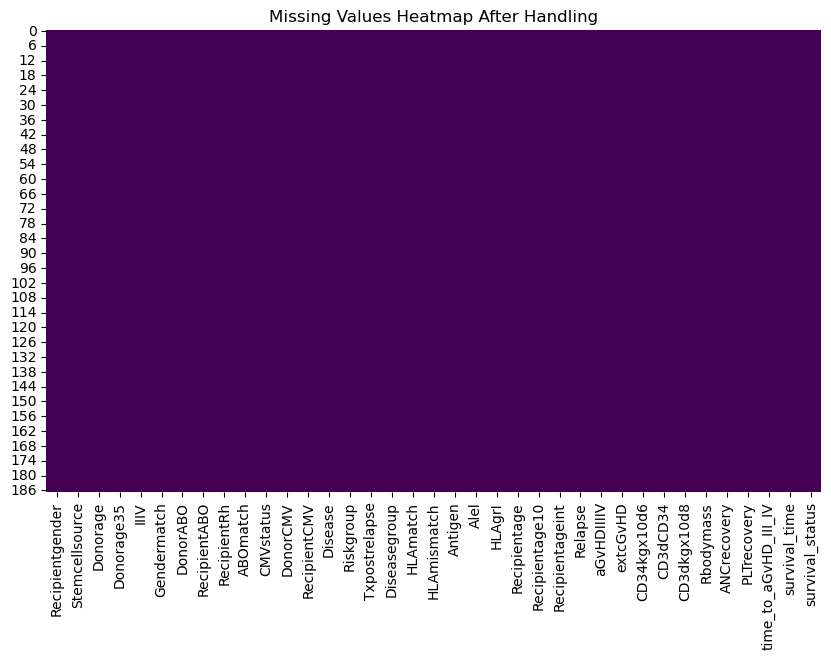

In [5]:
# Fill missing values with the mean of each numeric column
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify that there are no more missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Handling')
plt.show()

# Checking for significant outliers

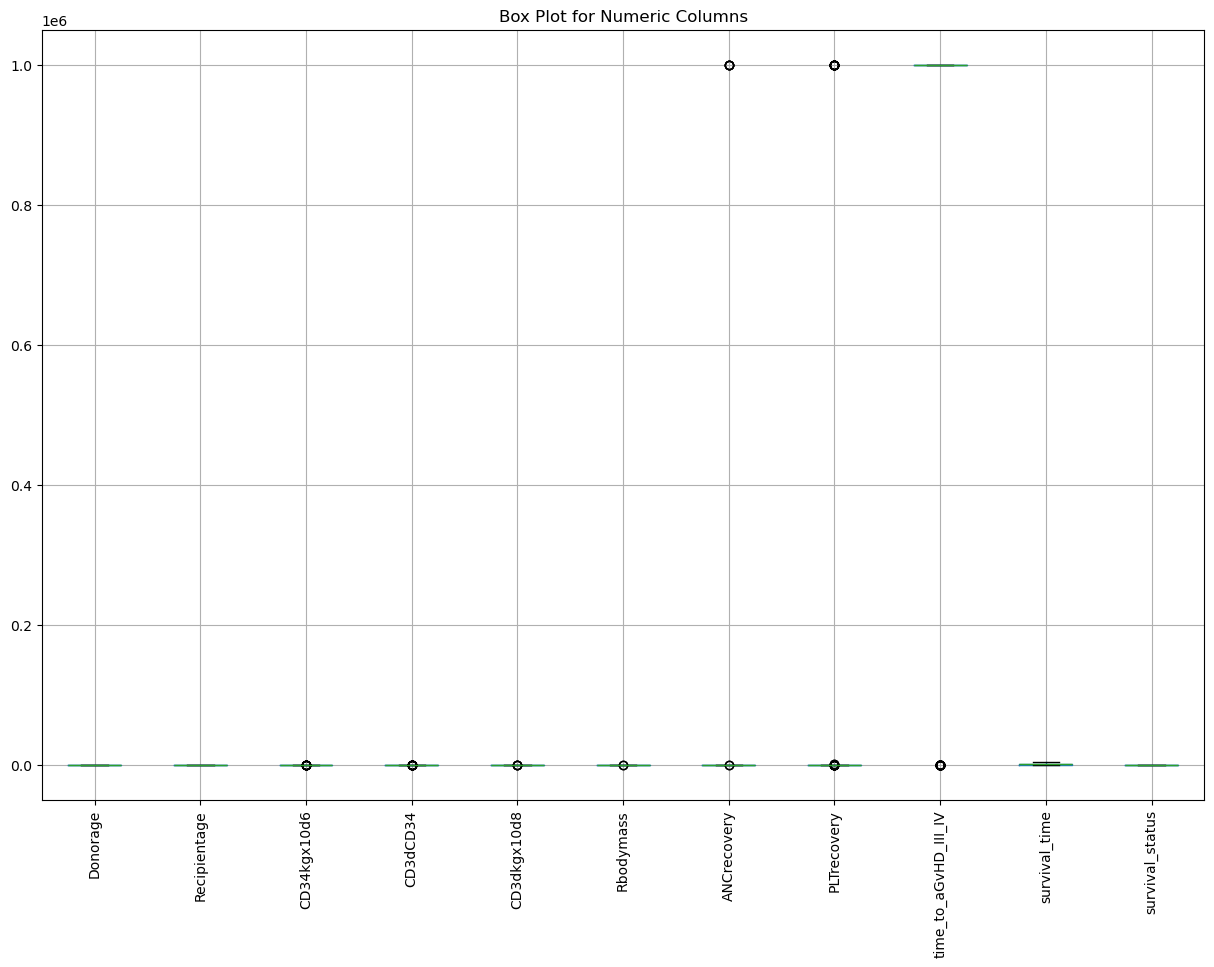

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each numeric column to visualize outliers
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot for Numeric Columns')
plt.show()

# Removing outliers

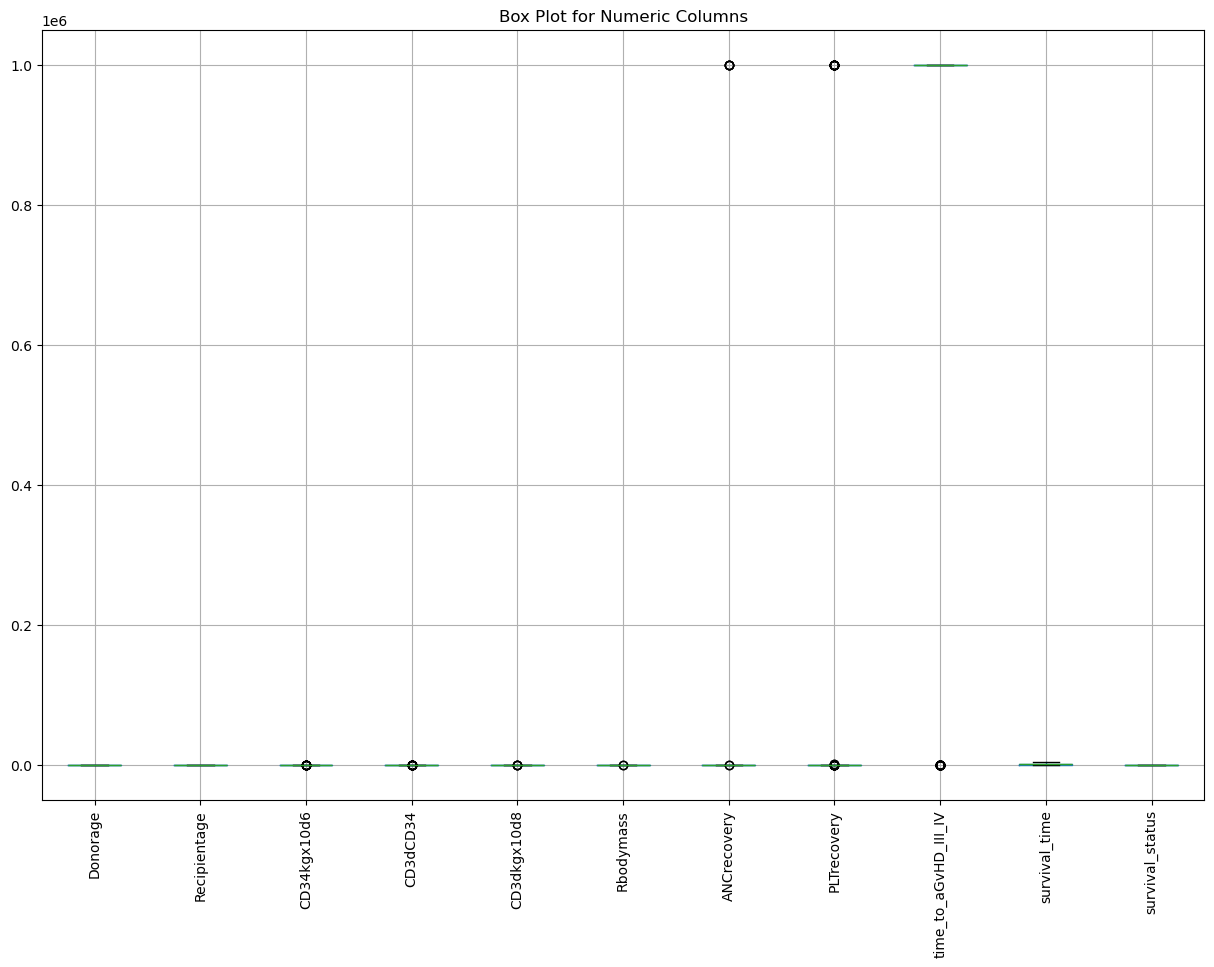

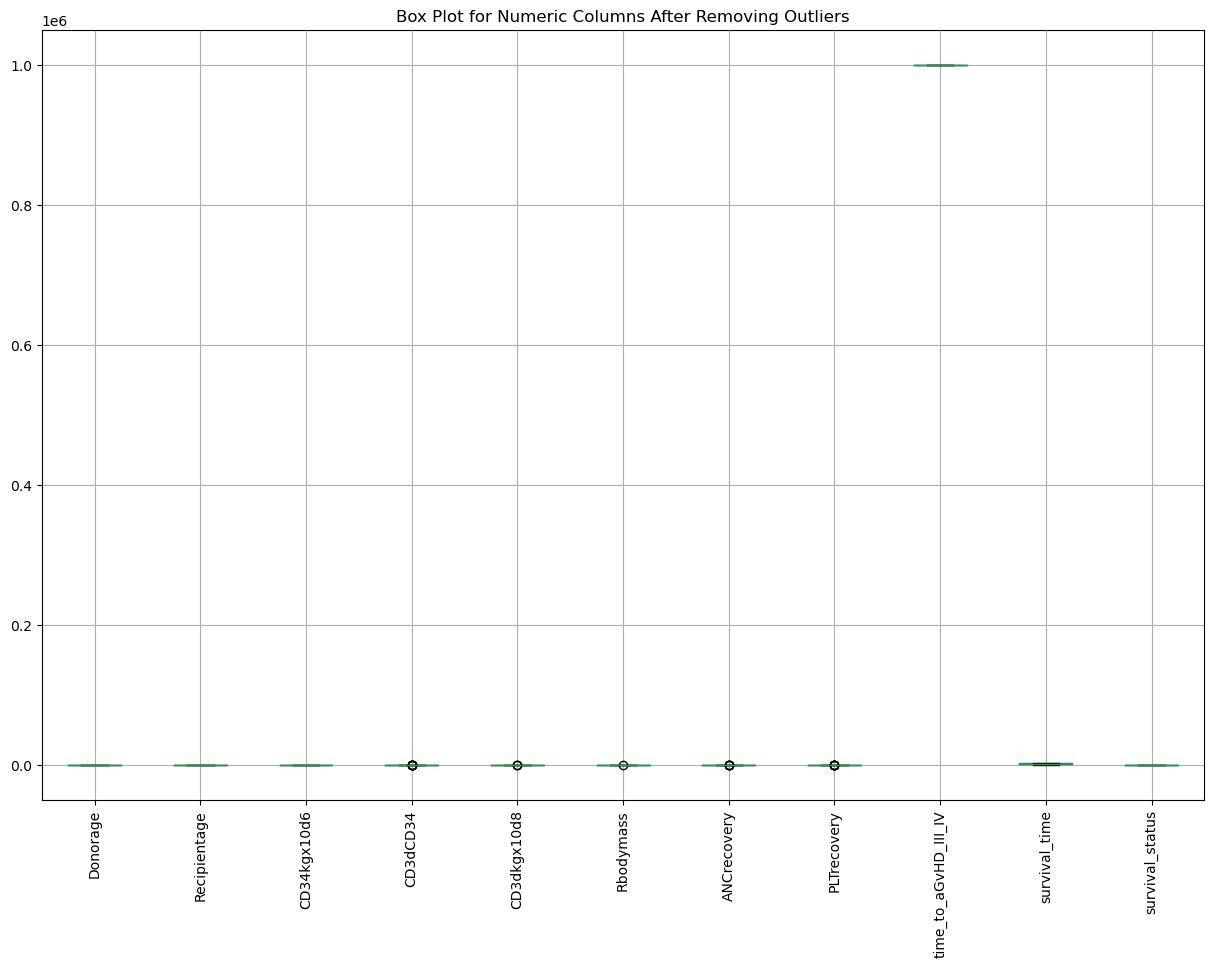

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create box plots for each numeric column to visualize outliers
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot for Numeric Columns')
plt.show()

# Remove outliers based on IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verify that outliers are removed
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot for Numeric Columns After Removing Outliers')
plt.show()